In [15]:
!pip install ultralytics

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
datase

In [16]:
data_path = "/kaggle/input/apr-proj2-dgs/balanced_output"

print("Train images:", data_path + "/train_out/images")
print("Val images:", data_path + "/val_out/images")
print("Test images:", data_path + "/test_out/images")

Train images: /kaggle/input/apr-proj2-dgs/balanced_output/train_out/images
Val images: /kaggle/input/apr-proj2-dgs/balanced_output/val_out/images
Test images: /kaggle/input/apr-proj2-dgs/balanced_output/test_out/images


In [17]:
yaml_content = f"""
train: {data_path}/train_out/images
val: {data_path}/val_out/images
test: {data_path}/test_out/images

nc: 2
names: ['fake','real']
"""
with open("data.yaml", "w") as f:
    f.write(yaml_content)

In [18]:
pip install "numpy<2" --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 

In [19]:
!yolo task=detect mode=train model=yolo11m.pt data=data.yaml epochs=100 imgsz=640 patience=25

Ultralytics 8.3.226 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=25, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

In [23]:
!yolo detect val model=/kaggle/working/runs/detect/train4/weights/best.pt data=/kaggle/working/data.yaml split=test

Ultralytics 8.3.226 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.1±1.1 MB/s, size: 77.8 KB)
val: Scanning /kaggle/input/apr-proj2-dgs/balanced_output/test_out/labels... 412 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 412/412 244.5it/s 1.7s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/apr-proj2-dgs/balanced_output/test_out is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 2.9it/s 8.9s0.3s
                   all        412        412      0.997      0.755      0.867      0.793
                  fake        412        412      0.997      0.755      0.867      0.793
Speed: 1.2ms preprocess, 17.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /kaggle/working/runs/detect/val
💡 Learn more at https://docs.ult

## Checking for Threshold

In [24]:
!yolo detect val model=/kaggle/working/runs/detect/train4/weights/best.pt data=/kaggle/working/data.yaml split=test conf=0.15

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Ultralytics 8.3.226 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 143.2±29.5 MB/s, size: 76.0 KB)
val: Scanning /kaggle/input/apr-proj2-dgs/balanced_output/test_out/labels... 412 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 412/412 958.1it/s 0.4s0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/apr-proj2-dgs/balanced_output/test_out is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 2.9it/s 8.9s0.3s
                   all        412        412          1      0.743      0.871      0.801
                  fake        412        412          1      0.743      0.871      0.801
Speed: 1

In [25]:
!yolo detect val model=/kaggle/working/runs/detect/train4/weights/best.pt data=/kaggle/working/data.yaml split=test conf=0.05

Ultralytics 8.3.226 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 119.2±20.5 MB/s, size: 74.7 KB)
val: Scanning /kaggle/input/apr-proj2-dgs/balanced_output/test_out/labels... 412 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 412/412 1.0Kit/s 0.4s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/apr-proj2-dgs/balanced_output/test_out is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 26/26 2.9it/s 8.9s0.3s
                   all        412        412      0.997      0.755      0.877      0.806
                  fake        412        412      0.997      0.755      0.877      0.806
Speed: 1.2ms preprocess, 17.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /kaggle/working/runs/detect/val3
💡 Learn more at https://docs.

In [28]:
!ls runs/detect/train4

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


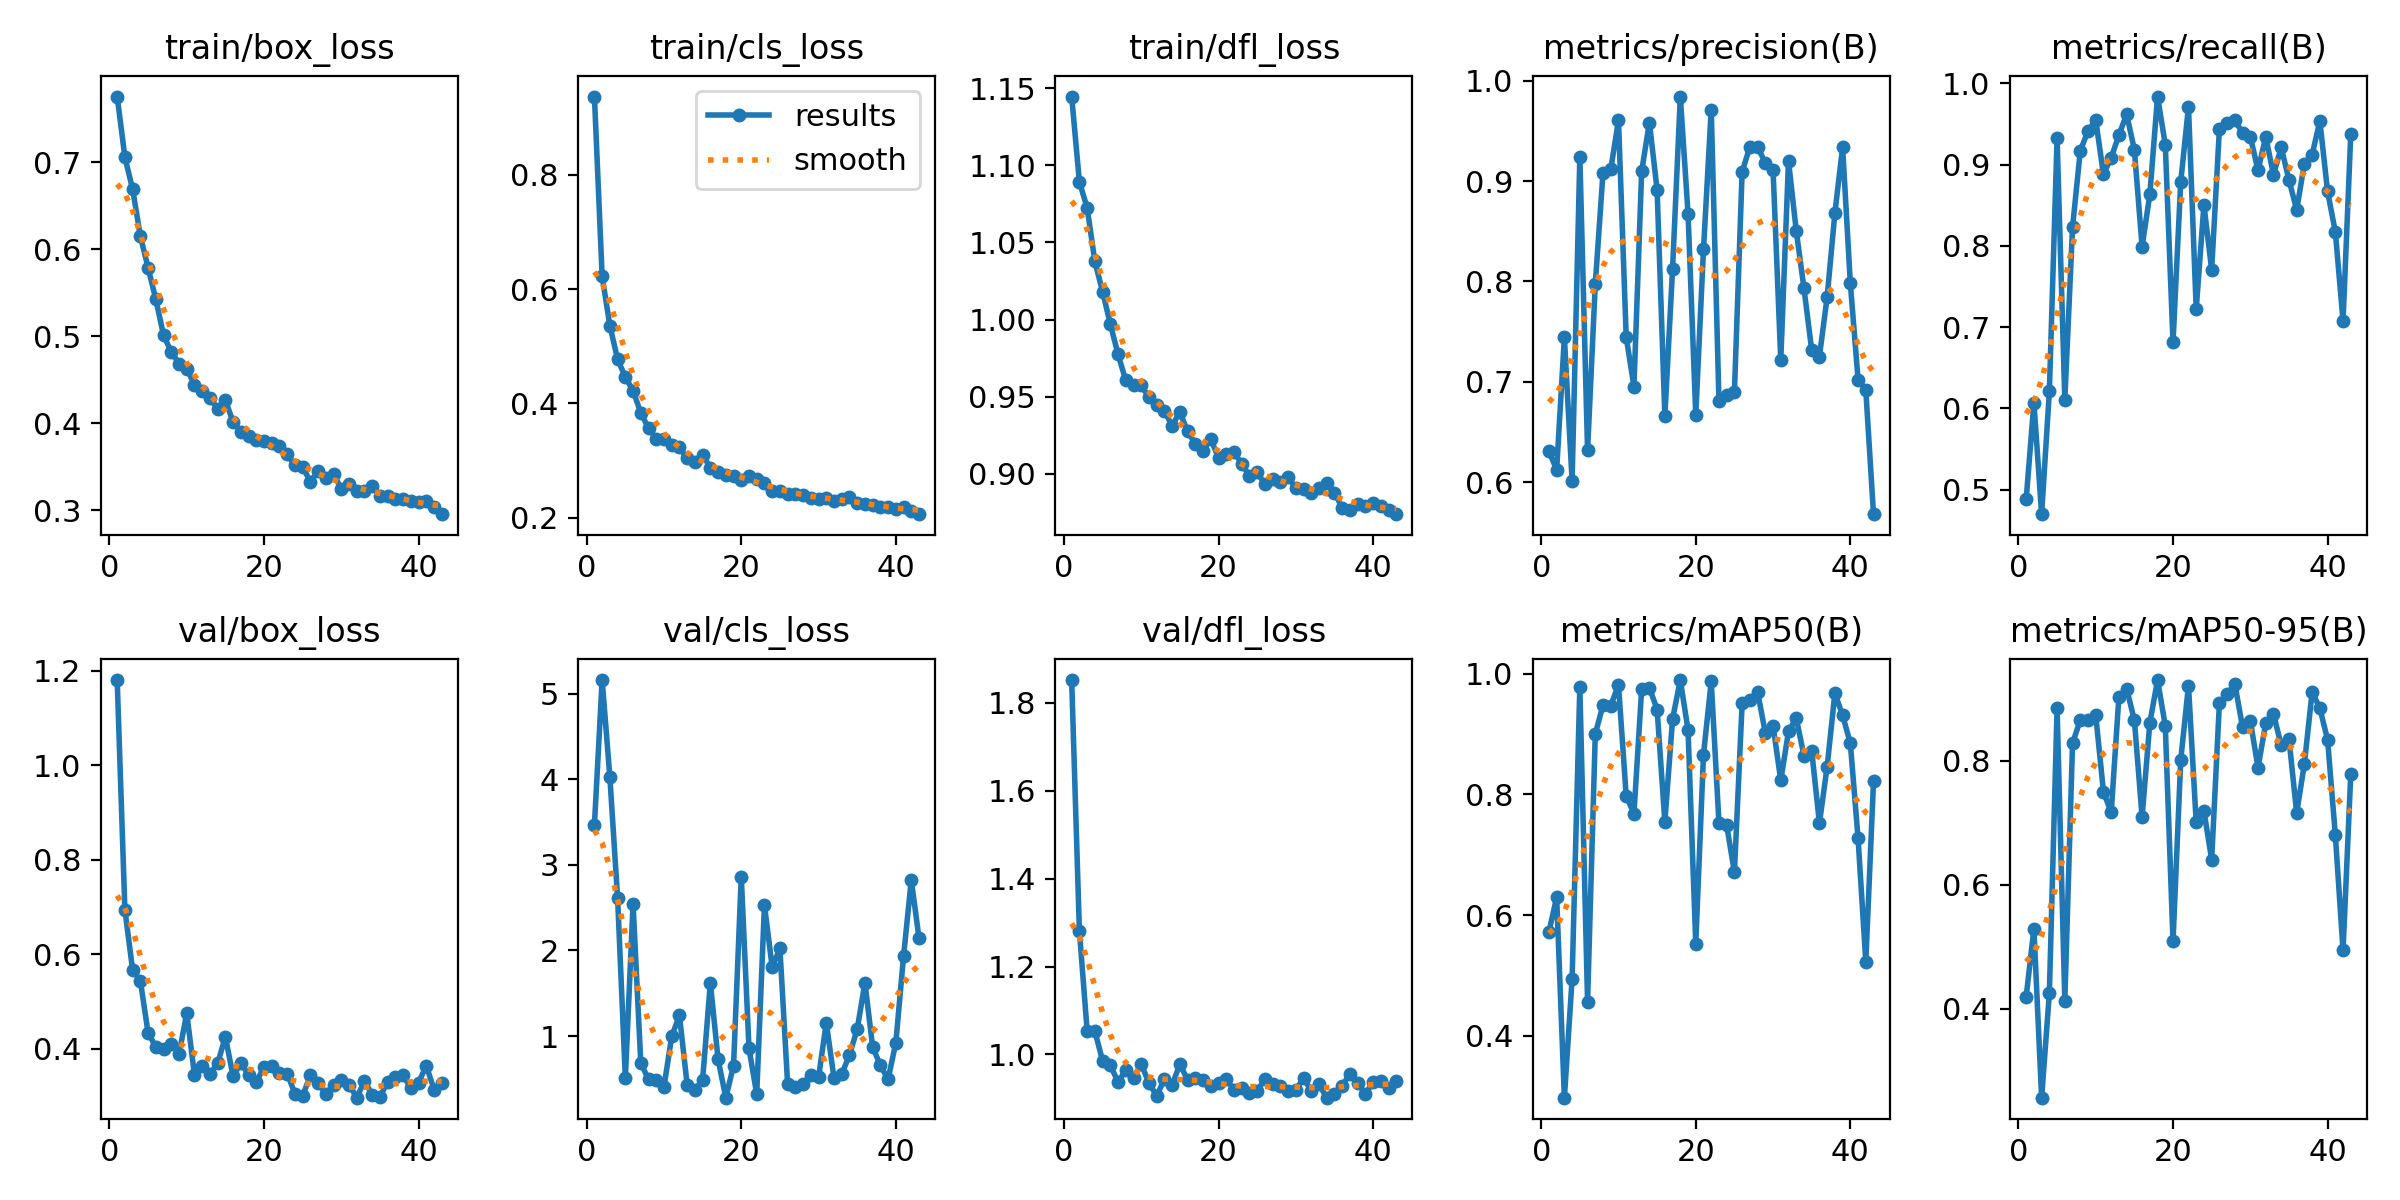

In [1]:
from IPython.display import Image

Image(filename='runs/detect/train4/results.png')

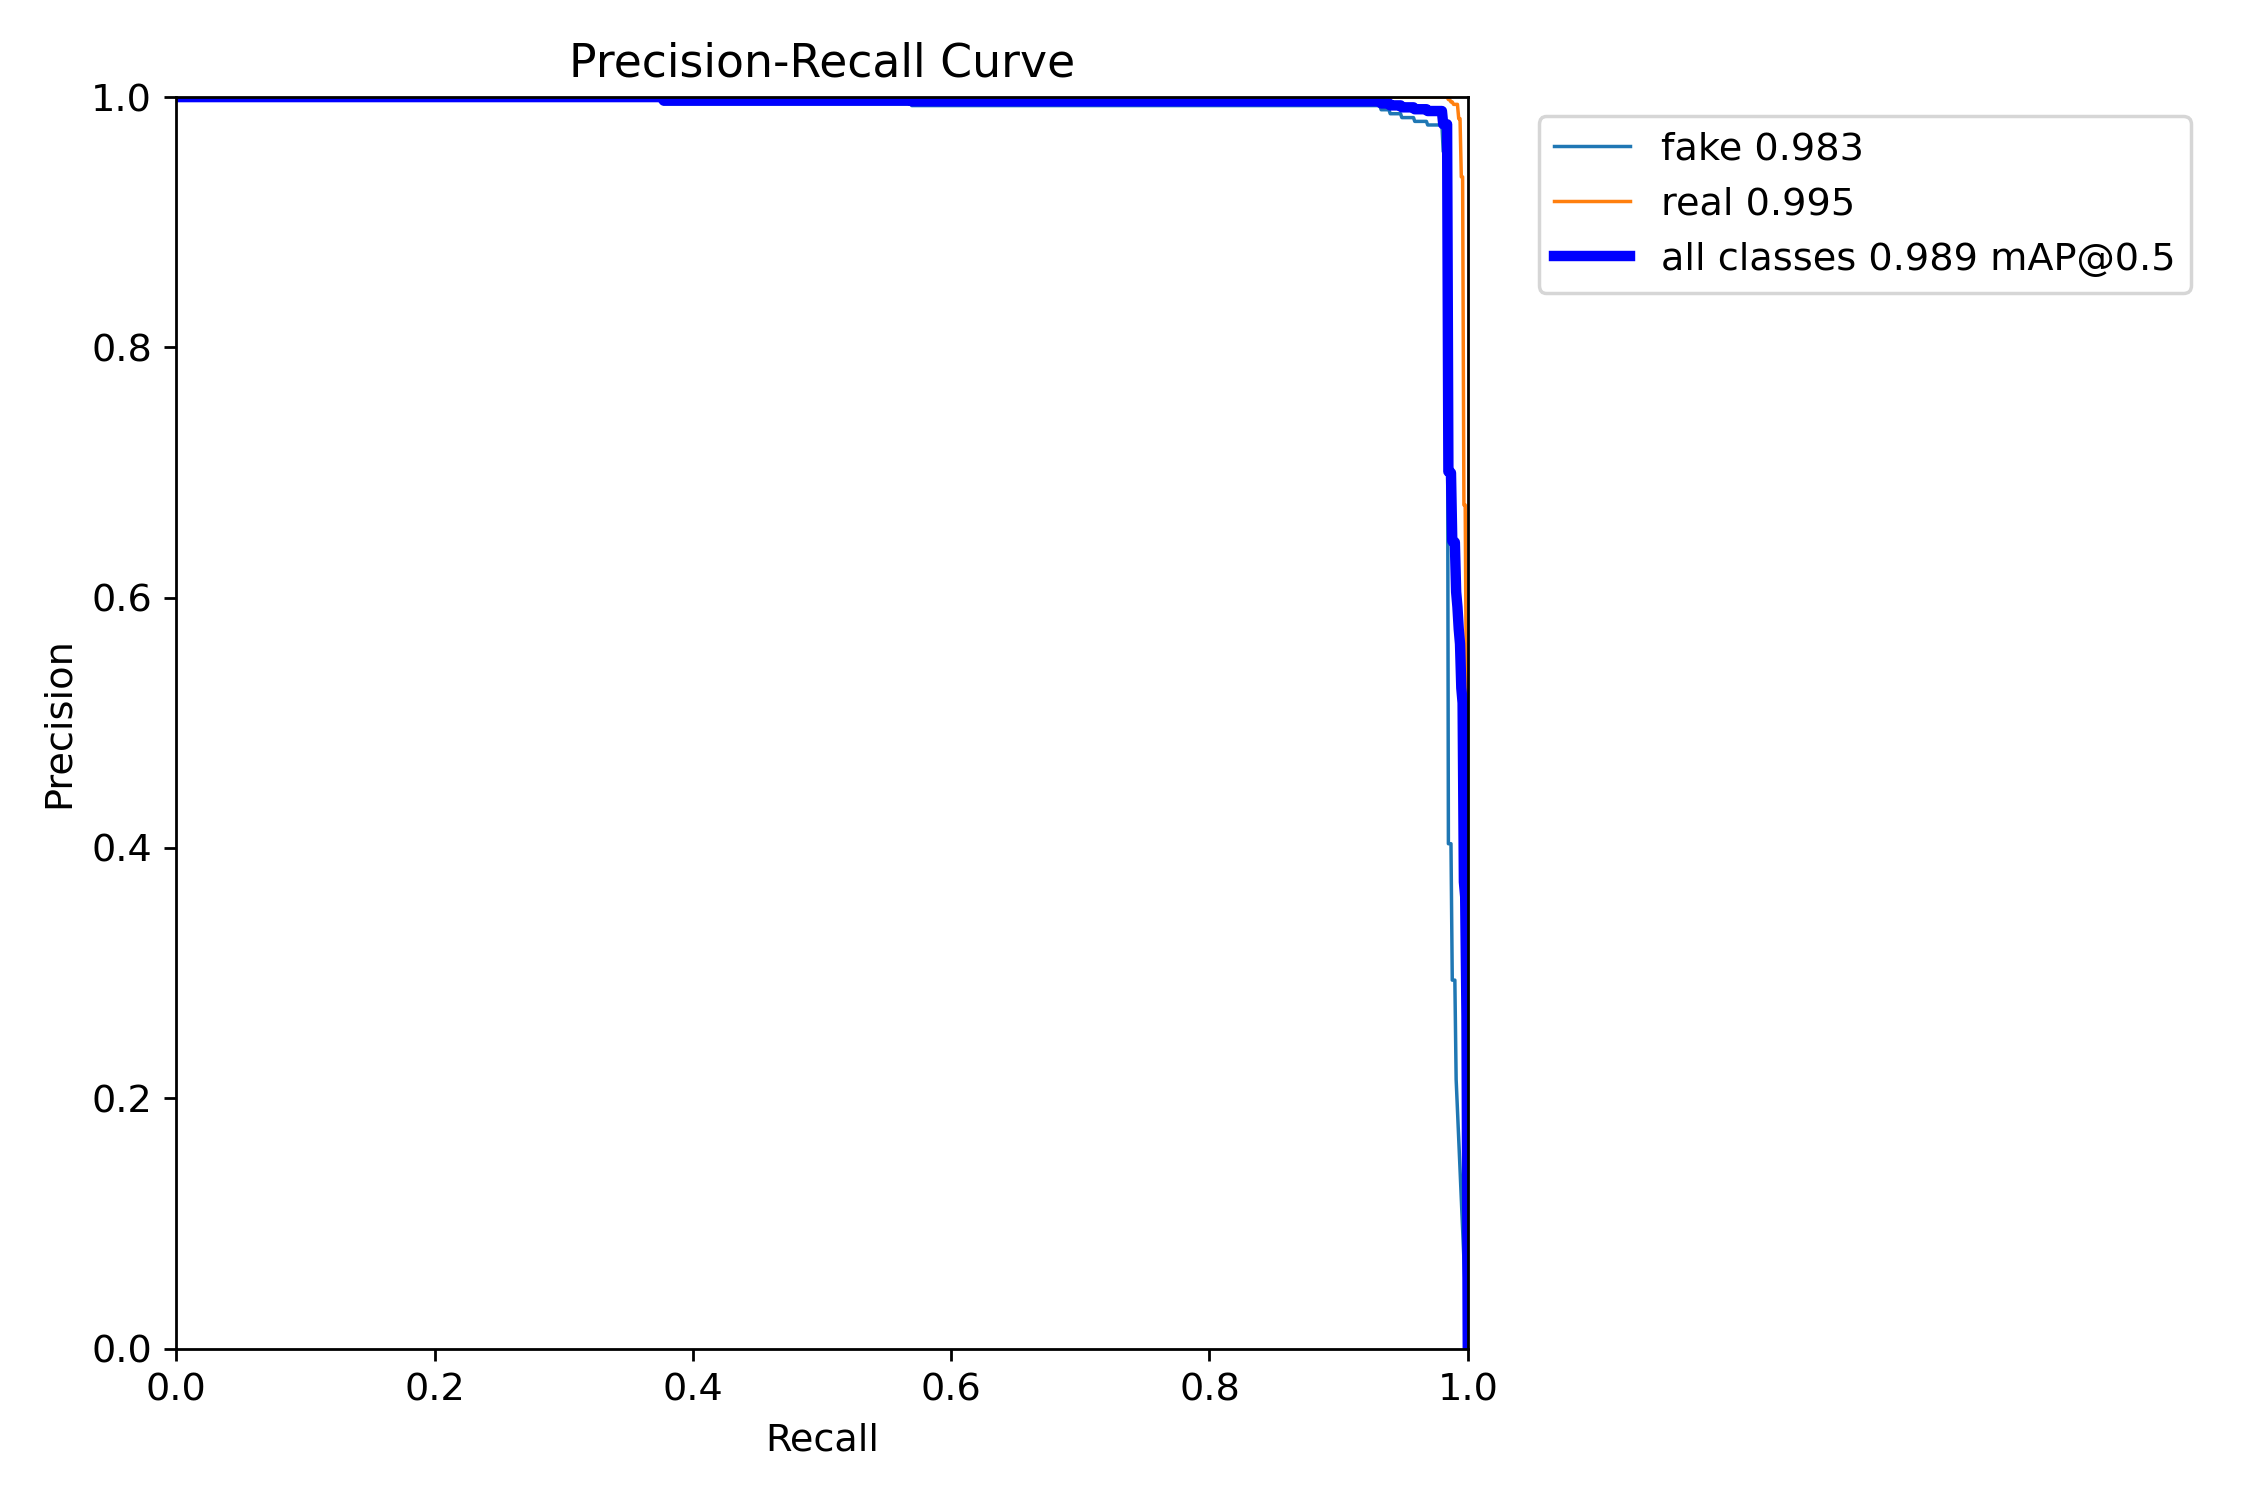

In [2]:
Image(filename='runs/detect/train4/BoxPR_curve.png')

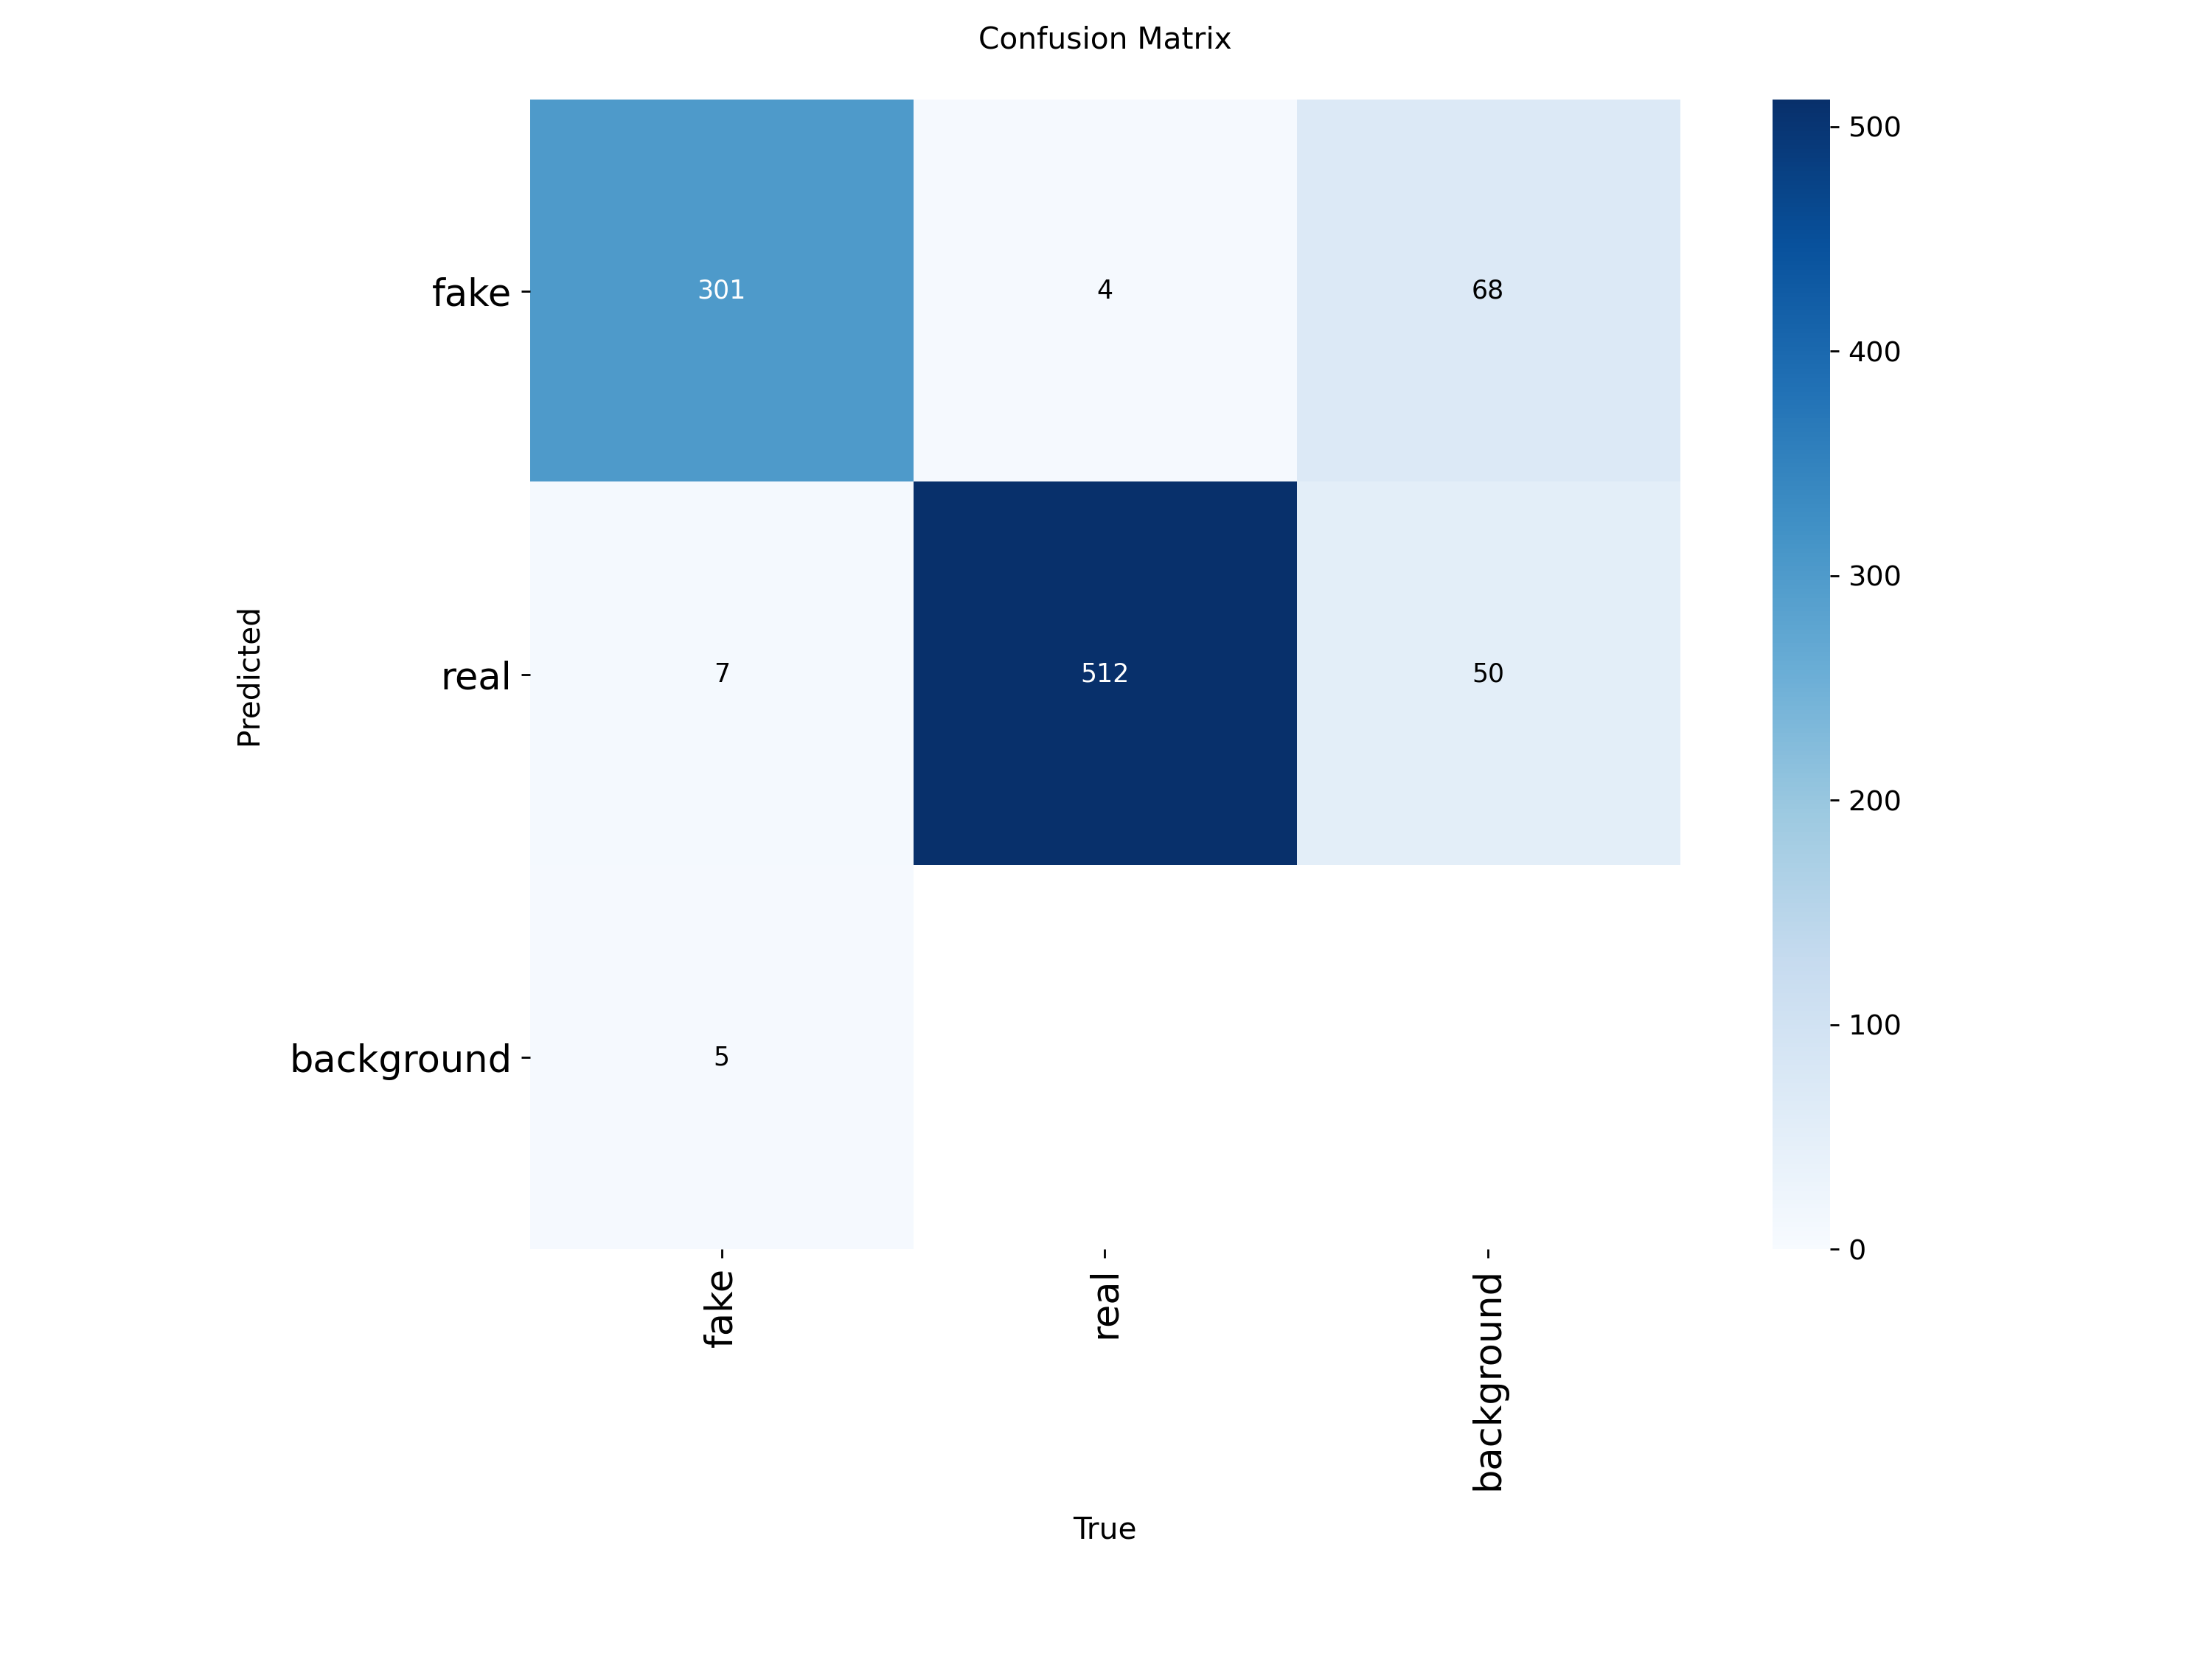

In [3]:
Image(filename='runs/detect/train4/confusion_matrix.png')